In [8]:
#[0]
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
import json #https://stackoverflow.com/questions/7100125/storing-python-dictionaries
import pickle #https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import os
#[1]
from sklearn.manifold import MDS
from scipy.spatial import procrustes
import matplotlib.pyplot as plt

%matplotlib inline

#[2]
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

#[3]
from sklearn import decomposition
from scipy.spatial import distance_matrix


from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap

#[2]
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

#[3]
from sklearn import decomposition
from scipy.spatial import distance_matrix


from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap

from sklearn.cluster import KMeans

In [6]:
emb = get_emotion_embedding()

# mds = MDS(n_components=2,n_init=15,random_state=0)
# X = mds.fit_transform(emb)

In [7]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=8).fit(emb)
labels = clustering.labels_



In [ ]:
clustering.

In [61]:
calcula_stress_embeddings(emb,X)

0.09178509772716702

In [66]:
labels

array([0, 7, 5, 1, 3, 1, 1, 6, 0, 4, 3, 1, 1, 7, 3, 0, 0, 0, 0, 7, 3, 3,
       0, 3, 0, 0, 6, 4, 4, 2, 0, 5, 0, 7, 7, 1, 0, 4, 1, 2, 0, 7, 0, 7,
       6, 3, 7, 1, 4, 2, 3, 3, 2, 7, 7, 1, 0, 5, 0, 0, 0, 3, 5, 0, 5, 0,
       0, 3, 3, 7, 4, 0, 4, 7])

In [70]:
for i in range(7):
    for s in [get_sentiments()[a] for (a,b) in enumerate(labels) if b == i]:
        print(s)
    print('\n')

astonished
distrustful
indignant
jealous
amused
disgusted
insulted
tired
suspicious
confused
hesitant
envious
impatient
annoyed
worried
startled
bored
frustrated
alarmed
angry
embarrassed
wavering


joyous
melancholic
amorous
empathic
lusting
contemplative
expectant
longing
triumphant


surprise
fear
content
guilt


desperate
dissatisfied
miserable
discontented
sad
distressed
apathetic
dejected
bitter
depressed
gloomy
despondent


passionate
polite
friendly
courageous
attentive
enthusiastic
ambitious


serene
peaceful
relaxed
calm
tense


condescending
contemptuous
conceited




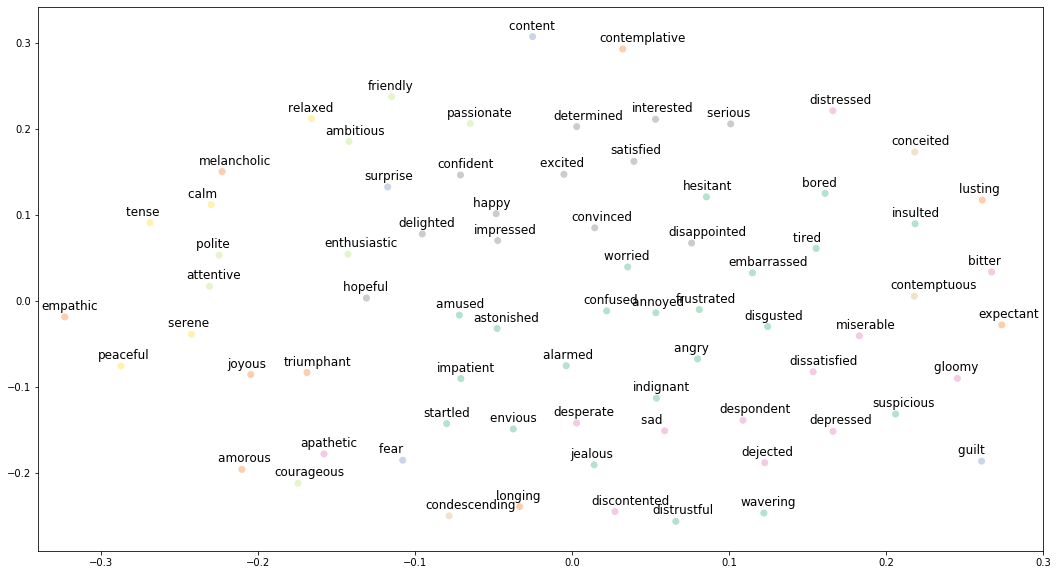

In [80]:
mds = MDS(n_components=2,n_init=15,random_state=2)
X = mds.fit_transform(emb)
fig, ax = plt.subplots(figsize=(18,10))
ax.set_xlim((-0.34,0.3))
ax.scatter(X[:,0], X[:,1], c=labels, cmap='Pastel2')   
n = get_sentiments()
for i, txt in enumerate(n):
    t = 8-len(txt)
    t = " "*t
    ax.annotate(txt+t, (X[:,0][i]-0.015, X[:,1][i]+0.008),size=12)

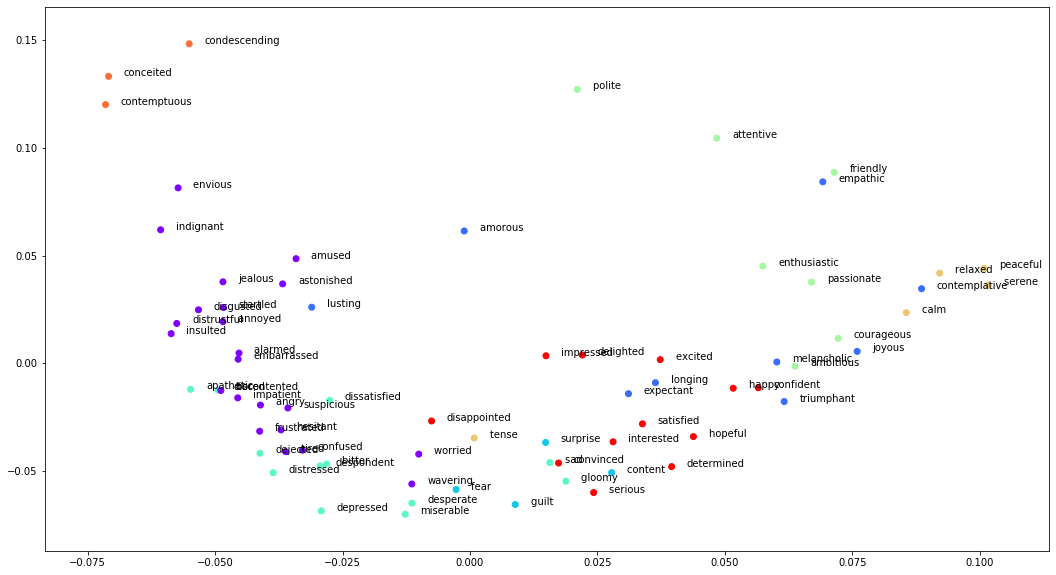

In [14]:
embedding = SpectralEmbedding(n_components=2)
X = embedding.fit_transform(emb)
fig, ax = plt.subplots(figsize=(18,10))
# ax.set_xlim((-0.33,0.35))
ax.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')   
n = get_sentiments()
for i, txt in enumerate(n):
    t = 8-len(txt)
    t = " "*t
    ax.annotate(txt+t, (X[:,0][i]+0.003, X[:,1][i]),size=10)

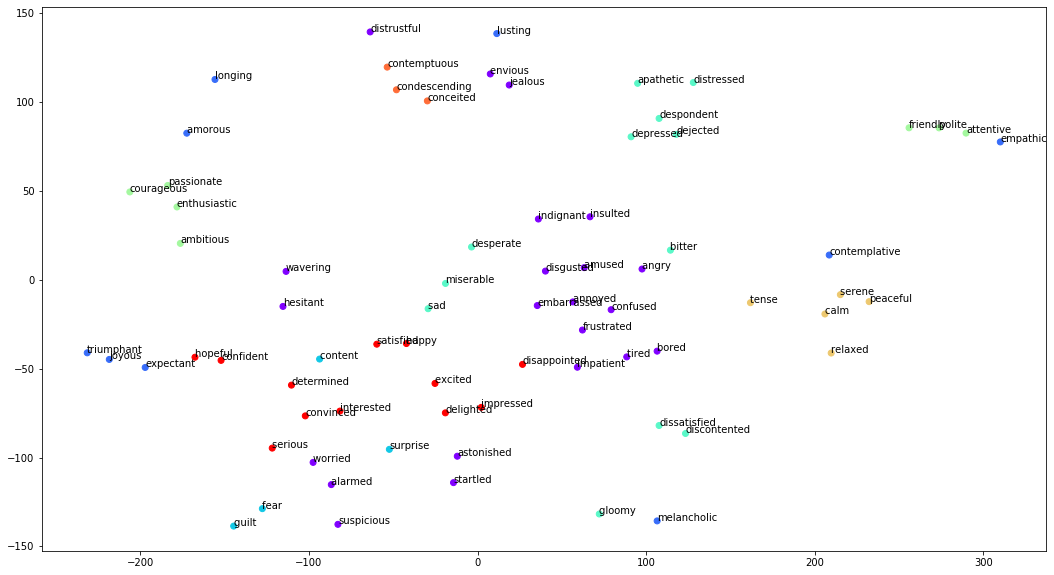

In [37]:
X = TSNE(n_components=2,perplexity=5,random_state=5).fit_transform(emb)


fig, ax = plt.subplots(figsize=(18,10))
# ax.set_xlim((-0.33,0.35))
ax.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')   
n = get_sentiments()
for i, txt in enumerate(n):
    t = 8-len(txt)
    t = " "*t
    ax.annotate(txt+t, (X[:,0][i], X[:,1][i]),size=10)

In [ ]:
mds = MDS(n_components=2,n_init=15,random_state=0)
X = mds.fit_transform(emb)
fig, ax = plt.subplots(figsize=(18,10))
# ax.set_xlim((-0.33,0.35))
ax.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')   
n = get_sentiments()
for i, txt in enumerate(n):
    t = 8-len(txt)
    t = " "*t
    ax.annotate(txt+t, (X[:,0][i]+0.003, X[:,1][i]),size=10)

In [5]:
def get_emotion_embedding():
    return get_emb_concat()

def get_final_embs(dimensions = 200):
    embs = get_clean_embeddings()
    embs += [get_emb_soma()]
    embs += [get_emb_concat()]


    mds = MDS(n_components=dimensions)
    #Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(len(embs)):
        transformed_embedding = mds.fit_transform(embs[i])
        embeddings += [transformed_embedding]
    embs = embeddings

    for a in range(len(embs)):
        for b in range(len(embs)):
            embs[a],embs[b],r = procrustes(embs[a],embs[b])
    for i in range(200):
        a = np.random.randint(len(embs))
        b = np.random.randint(len(embs))
        embs[a],embs[b],r = procrustes(embs[a],embs[b])
    return embs

def calcula_stress_embeddings(d_original, d_proposta):
    d_original = distance_matrix(d_original,d_original)
    d_proposta = distance_matrix(d_proposta,d_proposta)
    a = np.sum((d_original-d_proposta)**2)
    b = np.sum(d_original**2)
    return np.sqrt(a/b)/4

def calcula_stress(d_original, d_proposta):
    a = np.sum((d_original-d_proposta)**2)
    b = np.sum(d_original**2)
    return np.sqrt(a/b)/4

def get_emb_soma():
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_soma = np.zeros_like(embeddings[0])
    for i in embeddings:
        for c in range(75):
            assemble_embeddings_soma[c] = assemble_embeddings_soma[c] + i[c]
    return assemble_embeddings_soma

def get_emb_concat():
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_concat = []

    for c in range(len(sentiments)):
        tmp = np.array([])
        for i in embeddings:
            tmp = np.concatenate((tmp,i[c]))
        assemble_embeddings_concat += [tmp]
    return assemble_embeddings_concat


def get_emb_media():
    #média dos vetores e retirando outliers
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_media = np.zeros_like(embeddings[0])
    vec = []
    dist = []
    for c in range(75):
        tmp = np.array([])
        vec = []
        for i in embeddings:
            vec += [i[c]]

        centroid = np.zeros_like(vec[0])
        for i in vec:
            centroid = centroid + i
        centroid = centroid/len(vec)

        dist = []
        for i in vec:
            dist += [np.linalg.norm(i-centroid)]

        limitante_distancia_para_corte = np.max(dist)

        counter = 0
        for n,i in enumerate(embeddings):
            if dist[n]!=limitante_distancia_para_corte:
                assemble_embeddings_media[c] += i[c] 
                counter+=1

        assemble_embeddings_media[c] = assemble_embeddings_media[c]/counter
    return assemble_embeddings_media


def get_clean_embeddings():
#Seleciona somente os vetores principais das nossas embeddings
    sentiments = get_sentiments()
    raw_embeddings = []
    dimensions_size = []
    for i in range(4):
        tmp = get_vectors_embedding(i)
        raw_embeddings += [tmp]
        dimensions_size+=[len(get_sentiment_vector(tmp,sentiments[0]))]
#Faz o corte para o menor tamanho de dimensão
    n_dimensions = np.min(dimensions_size)
    # n_dimensions = 10
    mds = MDS(n_components=n_dimensions)
#Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(4):
        tmp_embedding = []
        for s in sentiments:
            tmp_embedding += [get_sentiment_vector(raw_embeddings[i],s)]
        transformed_embedding = mds.fit_transform(tmp_embedding)
        embeddings += [transformed_embedding]
    # Calcula erro entre nossos modelos
    for a in range(len(embeddings)):
        for b in range(len(embeddings)):
            embeddings[a],embeddings[b],r = procrustes(embeddings[a],embeddings[b])
    return embeddings

def print_anotado(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(emb[:,0], emb[:,1])
    n = get_sentiments()
    
    for i, txt in enumerate(n):
        ax.annotate(" "+txt, (emb[:,0][i], emb[:,1][i]))

def print_anotado2(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    for e in emb:
        ax.scatter(e[:,0], e[:,1])
        n = get_sentiments()

        for i, txt in enumerate(n):
            ax.annotate(txt, (e[:,0][i], e[:,1][i]))

def print_2d(embs):
    res = []
    mds_2 = MDS(n_components=2)
    for e in embs:
        res += [mds_2.fit_transform(e)]
    for p in res:
        plt.scatter(p[:,0],p[:,1])

def get_sentiment_vector(embedding, sentiment):
    return embedding[sentiment]["vectors"][sentiment]

def get_vectors_embedding(n):
    files = os.listdir("models")
    model_file_name = []
    for file in files:
        model_file_name += [file]
    escolhidos = [model_file_name[14],model_file_name[5],model_file_name[7],model_file_name[3]]
    with open("models/"+escolhidos[n], 'rb') as handle:
        b = pickle.load(handle)
    return b

def get_sentiments_old():
    sentiments = np.load("./sentiments_list.npy")
    return sentiments
def get_sentiments():
    sentiments = np.load("./sentiments_list.npy")
    sentiments = np.concatenate((sentiments[:26],sentiments[27:]))
    return sentiments